In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import  classification_report

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
X_train = np.load('/content/drive/MyDrive/x_train.npy')
Y_train = np.load('/content/drive/MyDrive/y_train.npy')
X_test = np.load('/content/drive/MyDrive/x_test.npy')
Y_test = np.load('/content/drive/MyDrive/y_test.npy')

In [5]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(2000, 128, 128, 1) (2000, 2) (120, 128, 128, 1) (120, 2)


In [ ]:
fig,axarr=plt.subplots(2,2,figsize=(15, 20))
img1 = X_train[0]
axarr[0,0].imshow(img1.squeeze(0),interpolation='nearest')
axarr[0,1].imshow(X_train[1],interpolation='nearest')
axarr[1,0].imshow(X_train[2],interpolation='nearest')
axarr[1,1].imshow(X_train[3],interpolation='nearest')

In [7]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [ ]:
Y_test

In [9]:
Y_train

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

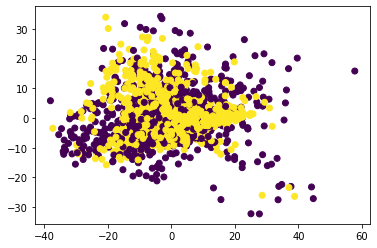

In [10]:
#PCA
pca = PCA(n_components = 2)
pca = pca.fit_transform(X_train.reshape(2000, 128*128))
plt.scatter(pca[:,0], pca[:,1], c = Y_train[:,0])
plt.show()

In [11]:
X_train = np.load('/content/drive/MyDrive/x_train.npy')
Y_train = np.load('/content/drive/MyDrive/y_train.npy')
X_test = np.load('/content/drive/MyDrive/x_test.npy')
Y_test = np.load('/content/drive/MyDrive/y_test.npy')

In [12]:
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [13]:
pca = PCA(n_components = 120)
X_train = pca.fit_transform(X_train.reshape(2000, 128*128))
X_test = pca.fit_transform(X_test.reshape(120, 128*128))
print(X_train.shape, X_test.shape)

(2000, 120) (120, 120)


In [14]:
#KNN
clf = KNeighborsClassifier(n_neighbors = 2).fit(X_train, Y_train)
clf_score = clf.score(X_test, Y_test)
print('Accuracy: ', clf_score)
y_pred = clf.predict(X_test)

classification_rep = classification_report(Y_test, y_pred)
print('Classification report\n', classification_rep)


Accuracy:  0.35833333333333334
Classification report
               precision    recall  f1-score   support

           0       0.58      0.48      0.53        60
           1       0.61      0.23      0.34        60

   micro avg       0.59      0.36      0.45       120
   macro avg       0.59      0.36      0.43       120
weighted avg       0.59      0.36      0.43       120
 samples avg       0.36      0.36      0.36       120



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
